<h1><b><center>Big Mart Sales Prediction</center></b></h1>

<h2><center>----------------------------------Libraries Used-----------------------------------------</center></h2>

In [1]:
library(data.table) # used for reading and manipulation of data
library(dplyr)      # used for data manipulation and joining
library(ggplot2)    # used for plotting 
library(corrplot)   # used for making correlation plot
library(cowplot)    # used for combining multiple plots    
library(caret)      # used for encoding categorical variables
library(rpart)      # used for decision tree regression
library(MLmetrics)  # used for measuring performance of models
library(randomForest)  # used for random forest regression


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'corrplot' was built under R version 3.6.1"corrplot 0.84 loaded
Warning message:
"package 'cowplot' was built under R version 3.6.1"
********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: lattice
Warning message:
"package 'MLmetrics' was built under R version 3.6.1"
Attaching package: 'MLmetrics'

Th

<h2><center>Importing and Cleaning the data</center></h2>

In [2]:
# importing the data
test = read.csv("Test.csv",stringsAsFactors = F)
train = read.csv("Train.csv",stringsAsFactors = F)
testsales = read.csv("Submission.csv",stringsAsFactors = F)
y_test = testsales[,4]

In [3]:
dim(train)

[1] 8523   12

In [4]:
dim(test)

[1] 5681   11

In [5]:
names(train)

[1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"               "Item_Outlet_Sales"

In [6]:
names(test)

[1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"

In [7]:
str(train)

'data.frame':	8523 obs. of  12 variables:
 $ Item_Identifier          : chr  "FDA15" "DRC01" "FDN15" "FDX07" ...
 $ Item_Weight              : num  9.3 5.92 17.5 19.2 8.93 ...
 $ Item_Fat_Content         : chr  "Low Fat" "Regular" "Low Fat" "Regular" ...
 $ Item_Visibility          : num  0.016 0.0193 0.0168 0 0 ...
 $ Item_Type                : chr  "Dairy" "Soft Drinks" "Meat" "Fruits and Vegetables" ...
 $ Item_MRP                 : num  249.8 48.3 141.6 182.1 53.9 ...
 $ Outlet_Identifier        : chr  "OUT049" "OUT018" "OUT049" "OUT010" ...
 $ Outlet_Establishment_Year: int  1999 2009 1999 1998 1987 2009 1987 1985 2002 2007 ...
 $ Outlet_Size              : chr  "Medium" "Medium" "Medium" "" ...
 $ Outlet_Location_Type     : chr  "Tier 1" "Tier 3" "Tier 1" "Tier 3" ...
 $ Outlet_Type              : chr  "Supermarket Type1" "Supermarket Type2" "Supermarket Type1" "Grocery Store" ...
 $ Item_Outlet_Sales        : num  3735 443 2097 732 995 ...


In [8]:
str(test)

'data.frame':	5681 obs. of  11 variables:
 $ Item_Identifier          : chr  "FDW58" "FDW14" "NCN55" "FDQ58" ...
 $ Item_Weight              : num  20.75 8.3 14.6 7.32 NA ...
 $ Item_Fat_Content         : chr  "Low Fat" "reg" "Low Fat" "Low Fat" ...
 $ Item_Visibility          : num  0.00756 0.03843 0.09957 0.01539 0.1186 ...
 $ Item_Type                : chr  "Snack Foods" "Dairy" "Others" "Snack Foods" ...
 $ Item_MRP                 : num  107.9 87.3 241.8 155 234.2 ...
 $ Outlet_Identifier        : chr  "OUT049" "OUT017" "OUT010" "OUT017" ...
 $ Outlet_Establishment_Year: int  1999 2007 1998 2007 1985 1997 2009 1985 2002 2007 ...
 $ Outlet_Size              : chr  "Medium" "" "" "" ...
 $ Outlet_Location_Type     : chr  "Tier 1" "Tier 2" "Tier 3" "Tier 2" ...
 $ Outlet_Type              : chr  "Supermarket Type1" "Supermarket Type1" "Grocery Store" "Supermarket Type1" ...


In [9]:
test$Item_Outlet_Sales = NA 
combi = rbind(train,test) # combining training set and test set
dim(combi)

[1] 14204    12

In [10]:
head(combi)

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDA15,9.300,Low Fat,0.01604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.01927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.01676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.00000000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.00000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.00000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


<h2><center>Exploring the Data</center></h2>

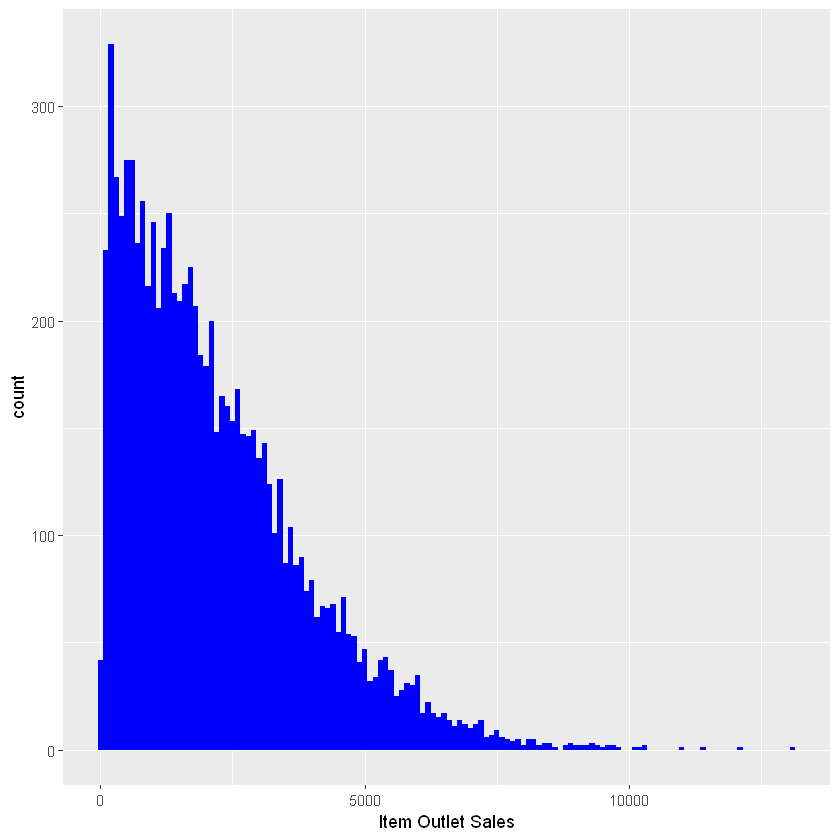

In [11]:
ggplot(train,aes(train$Item_Outlet_Sales))+ geom_histogram(binwidth = 100,fill = "Blue")+xlab("Item Outlet Sales")

Warning message:
"Removed 2439 rows containing non-finite values (stat_bin)."

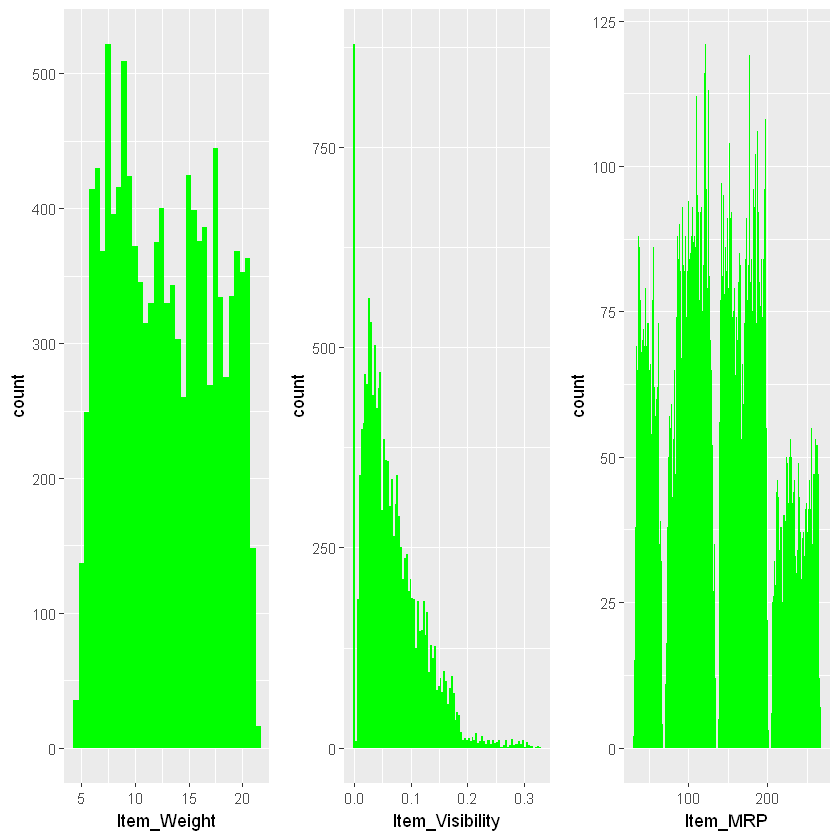

In [12]:
p1 = ggplot(combi,aes(combi$Item_Weight))+geom_histogram(binwidth = 0.5,fill = "Green")+xlab("Item_Weight")
p2 = ggplot(combi) + geom_histogram(aes(Item_Visibility), bins = 100,fill = "Green")+xlab("Item_Visibility")
p3 = ggplot(combi,aes(combi$Item_MRP))+geom_histogram(binwidth = 1,fill = "Green")+xlab("Item_MRP")
plot_grid(p1,p2,p3,nrow = 1)

<h2>Observations:</h2>
<h3>
<ul><li>There seems no clear cut pattern in Item_Weight.</li><br>
    <li>Item_Visibility is right-skewed and should be transformed to curb its skewness.</li><br>
    <li>We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.</li><br>
    </ul></h3>

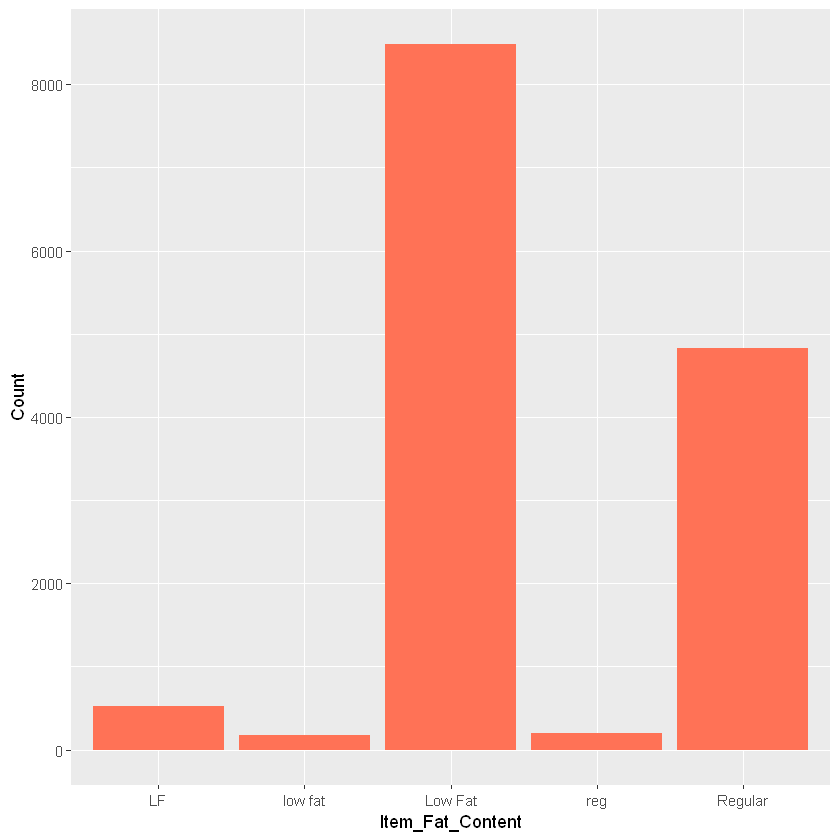

In [13]:
ggplot(combi %>% group_by(Item_Fat_Content) %>% summarise(Count = n())) +
geom_bar(aes(Item_Fat_Content, Count), stat = "identity", fill = "coral1")

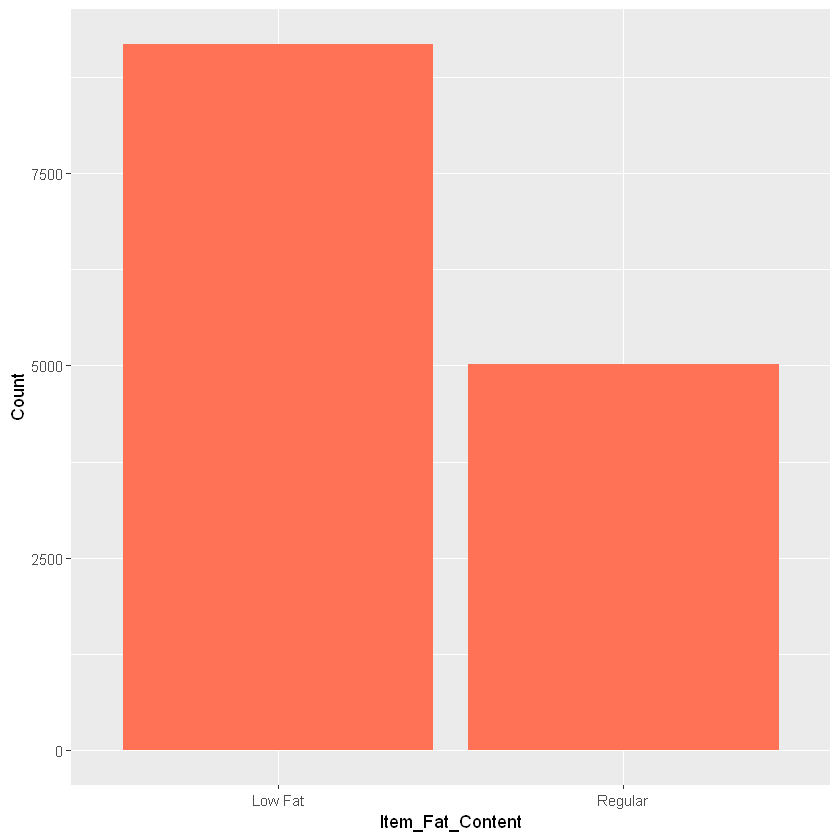

In [14]:
combi$Item_Fat_Content[combi$Item_Fat_Content == "LF"] = "Low Fat" 
combi$Item_Fat_Content[combi$Item_Fat_Content == "low fat"] = "Low Fat" 
combi$Item_Fat_Content[combi$Item_Fat_Content == "reg"] = "Regular"
ggplot(combi %>% group_by(Item_Fat_Content) %>% summarise(Count = n())) +
geom_bar(aes(Item_Fat_Content, Count), stat = "identity", fill = "coral1")

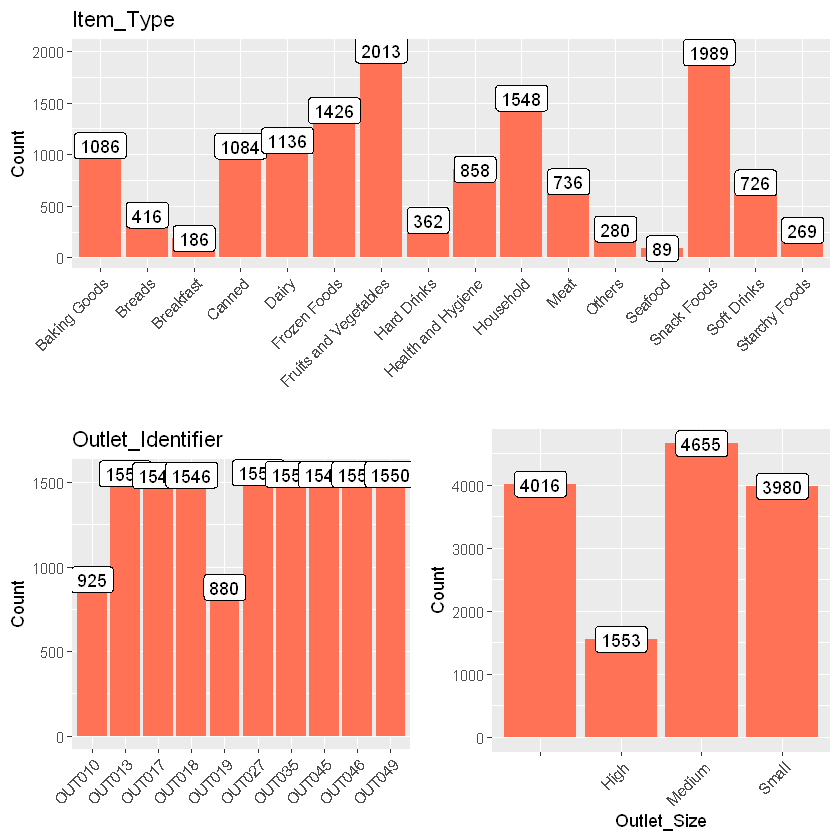

In [15]:
# plot for Item_Type 
p4 = ggplot(combi %>% group_by(Item_Type) %>% summarise(Count = n()),aes(Item_Type, Count)) +
geom_bar( stat = "identity", fill = "coral1") +
xlab("") +
geom_label(aes(Item_Type, Count, label = Count), vjust = 0.5) +
theme(axis.text.x = element_text(angle = 45, hjust = 1))+
ggtitle("Item_Type")
# plot for Outlet_Identifier 
p5 = ggplot(combi %>% group_by(Outlet_Identifier) %>% summarise(Count = n()),aes(Outlet_Identifier, Count)) +
geom_bar( stat = "identity", fill = "coral1") +
xlab("") +
geom_label(aes(Outlet_Identifier, Count, label = Count), vjust = 0.5) +
theme(axis.text.x = element_text(angle = 45, hjust = 1))+
ggtitle("Outlet_Identifier")
# plot for Outlet_Size
p6 = ggplot(combi %>% group_by(Outlet_Size) %>% summarise(Count = n()),aes(Outlet_Size, Count)) +
geom_bar( stat = "identity", fill = "coral1") +
geom_label(aes(Outlet_Size, Count, label = Count), vjust = 0.5) +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

second_row = plot_grid(p5, p6, nrow = 1)
plot_grid(p4, second_row, ncol = 1)

<h2>In Outlet_Size,for 4016 observations,Outlet_Size is missing or blank.</h2><br>

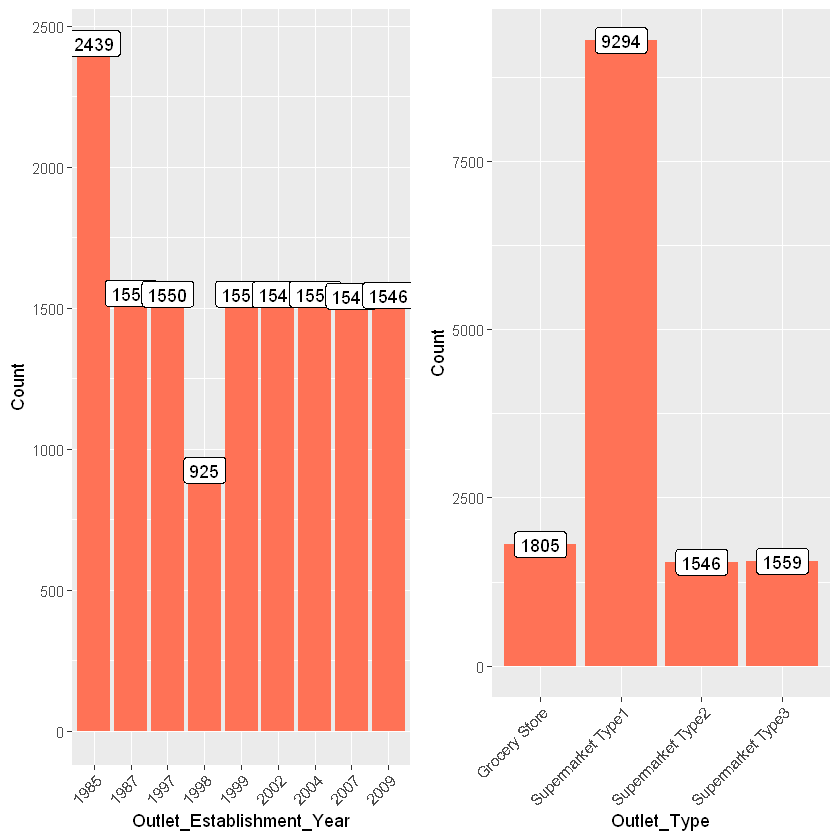

In [16]:
# plot for Outlet_Establishment_Year
p7 = ggplot(combi %>% group_by(Outlet_Establishment_Year) %>% summarise(Count = n())) +
geom_bar(aes(factor(Outlet_Establishment_Year), Count), stat = "identity", fill = "coral1") +
geom_label(aes(factor(Outlet_Establishment_Year), Count, label = Count), vjust = 0.5) + 
xlab("Outlet_Establishment_Year") +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

# plot for Outlet_Type 
p8 = ggplot(combi %>% group_by(Outlet_Type) %>% summarise(Count = n())) +
geom_bar(aes(Outlet_Type, Count), stat = "identity", fill = "coral1") +
geom_label(aes(factor(Outlet_Type), Count, label = Count), vjust = 0.5) +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

# ploting both plots together 
plot_grid(p7, p8, ncol = 2)

<h3><b>Observations:</b><br>
    <ul><li>Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.</li><br>
        <li>Supermarket Type 1 seems to be the most popular category of Outlet_Type.</li>
    </ul>
    </h3>

In [17]:
train = combi[1:nrow(train),] # extracting train data from the combined data

<h3><center>Target Variable Vs Independent Numerical Variable</center></h3>

Warning message:
"Removed 1463 rows containing missing values (geom_point)."

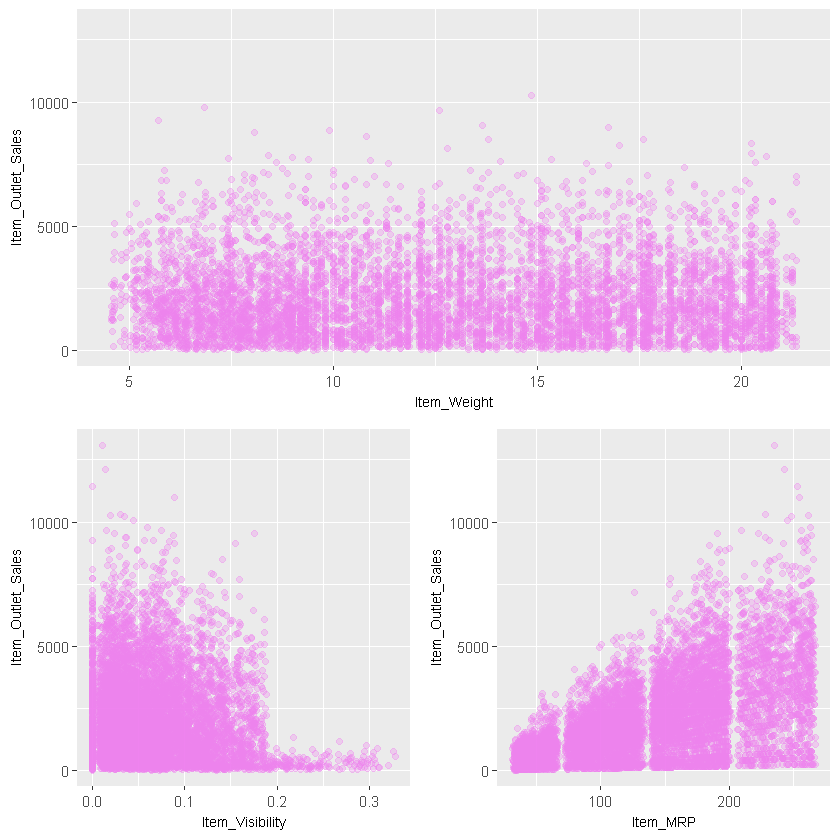

In [18]:
# Item_Weight vs Item_Outlet_Sales 
p9 = ggplot(train) +
geom_point(aes(Item_Weight, Item_Outlet_Sales), colour = "violet", alpha = 0.3) +
theme(axis.title = element_text(size = 8.5))

# Item_Visibility vs Item_Outlet_Sales 
p10 = ggplot(train) +
geom_point(aes(Item_Visibility, Item_Outlet_Sales), colour = "violet", alpha = 0.3) +
theme(axis.title = element_text(size = 8.5))

# Item_MRP vs Item_Outlet_Sales 
p11 = ggplot(train) +
geom_point(aes(Item_MRP, Item_Outlet_Sales), colour = "violet", alpha = 0.3) +
theme(axis.title = element_text(size = 8.5))

second_row_2 = plot_grid(p10, p11, ncol = 2)
plot_grid(p9, second_row_2, nrow = 2)

<h3><b>Observations:</b><br>
    <ul><li>Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.</li><br>
        <li>In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero.</li><br>
        <li>In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments.</li></ul></h3>

<h3><center>Target Variable vs Independent Categorical Variable</center></h3>

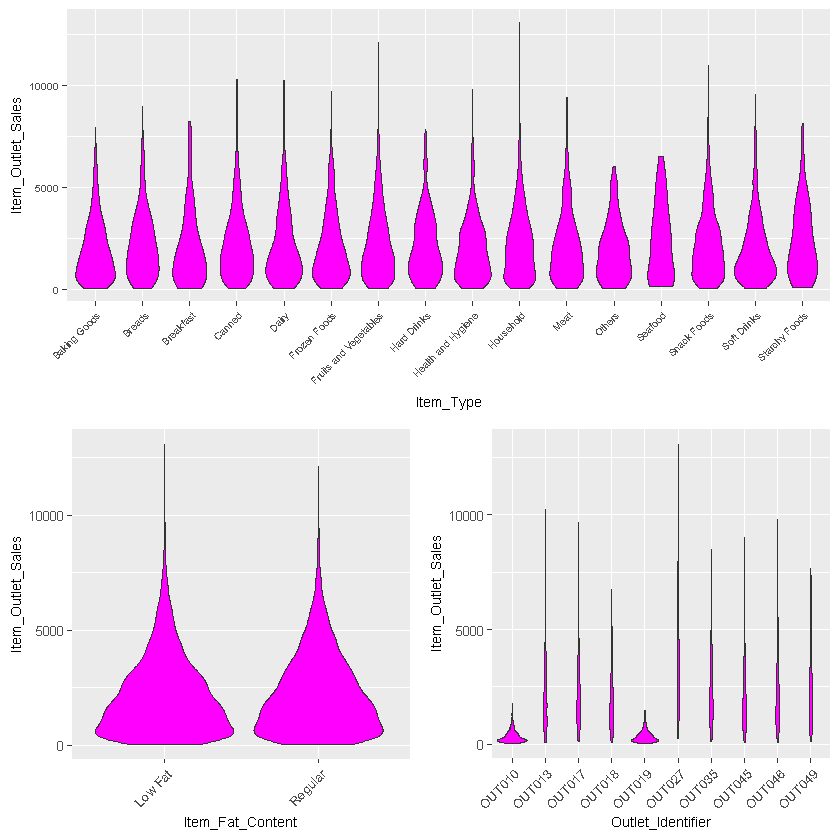

In [19]:
# Item_Type vs Item_Outlet_Sales 
p12 = ggplot(train) +
geom_violin(aes(Item_Type, Item_Outlet_Sales), fill = "magenta") +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
      axis.text = element_text(size = 6),
      axis.title = element_text(size = 8.5))

# Item_Fat_Content vs Item_Outlet_Sales 
p13 = ggplot(train) +
geom_violin(aes(Item_Fat_Content, Item_Outlet_Sales), fill = "magenta") +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
      axis.text = element_text(size = 8),
      axis.title = element_text(size = 8.5))

# Outlet_Identifier vs Item_Outlet_Sales 
p14 = ggplot(train) +
geom_violin(aes(Outlet_Identifier, Item_Outlet_Sales), fill = "magenta") +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
      axis.text = element_text(size = 8),
      axis.title = element_text(size = 8.5))

second_row_3 = plot_grid(p13, p14, ncol = 2)
plot_grid(p12, second_row_3, ncol = 1)

<h3>Observations:<br>
    <ul>
        <li>Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.</li><br>
        <li>The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.</li><br>
    </ul>
</h3>

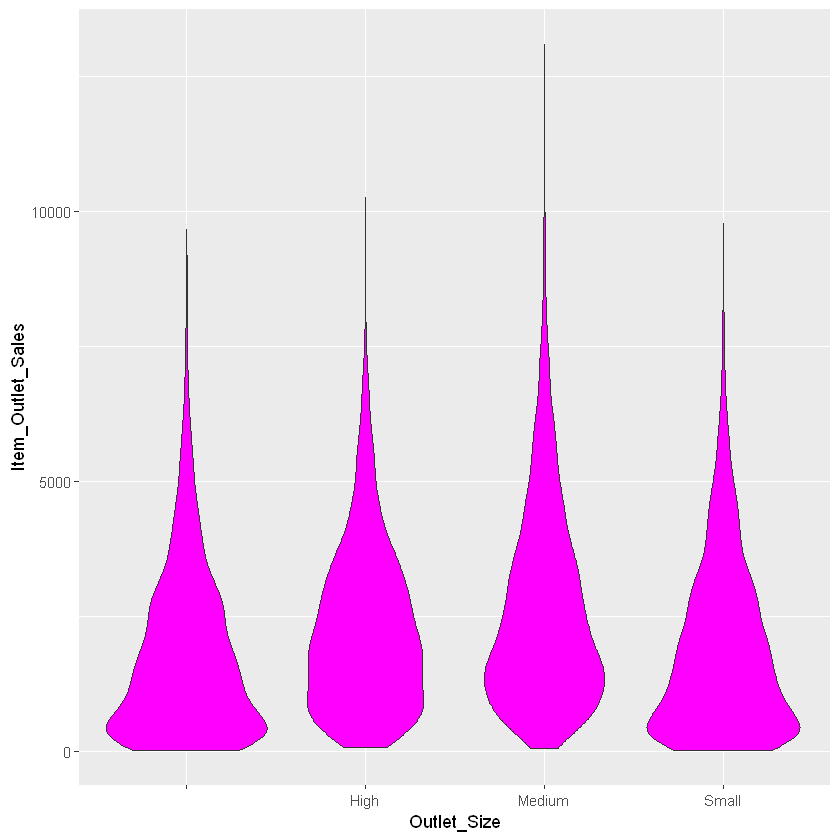

In [20]:
ggplot(train) + geom_violin(aes(Outlet_Size, Item_Outlet_Sales), fill = "magenta")

<h2>The distribution of ‘Small’ Outlet_Size is almost identical to the distribution of the blank category (first violin) of Outlet_Size. So, we can substitute the blanks in Outlet_Size with ‘Small’.</h2>

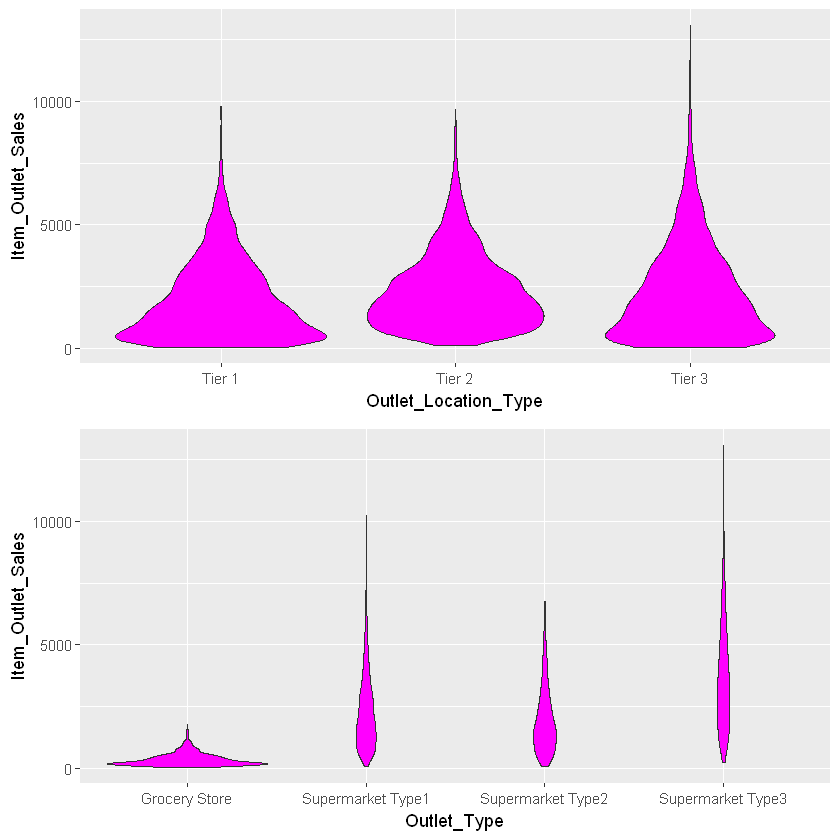

In [21]:
p15 = ggplot(train) +
geom_violin(aes(Outlet_Location_Type, Item_Outlet_Sales), fill = "magenta")
p16 = ggplot(train) +
geom_violin(aes(Outlet_Type, Item_Outlet_Sales), fill = "magenta")
plot_grid(p15, p16, ncol = 1)

<h3>Observations:<br>
    <ul>
        <li>Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.</li><br>
        <li>In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.</li><br>
    </ul>
</h3>

In [22]:
sum(is.na(combi$Item_Weight))

[1] 2439

In [23]:
missing_index = which(is.na(combi$Item_Weight))
for(i in missing_index){
    item = combi$Item_Identifier[i]
    combi$Item_Weight[i] = mean(combi$Item_Weight[combi$Item_Identifier == item], na.rm = T)
}

In [24]:
sum(is.na(combi$Item_Weight))

[1] 0

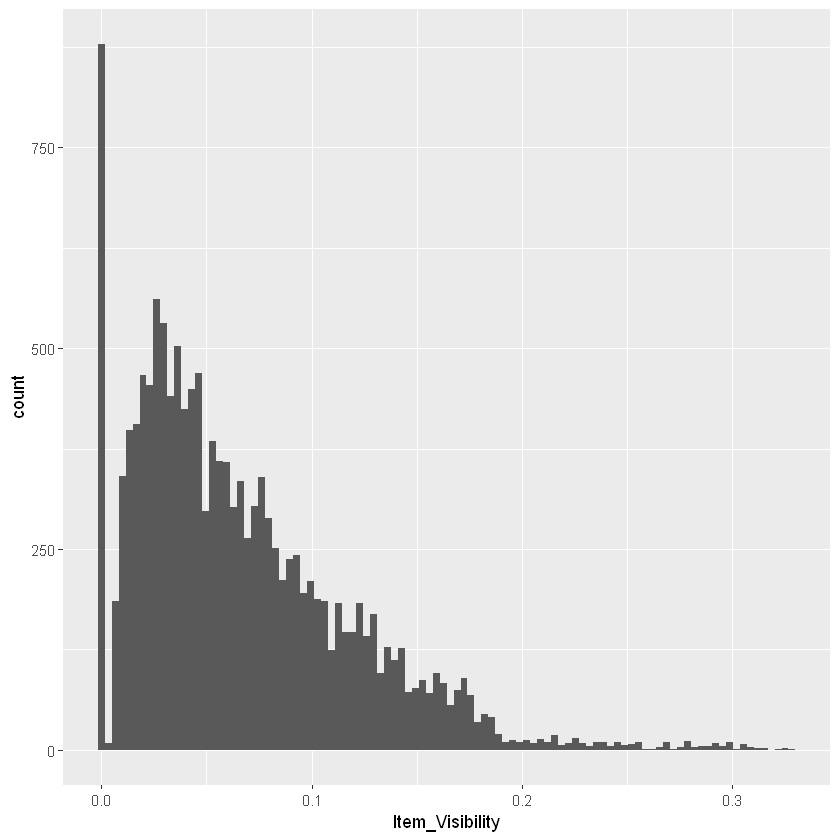

In [25]:
ggplot(combi) + geom_histogram(aes(Item_Visibility), bins = 100)

In [26]:
zero_index = which(combi$Item_Visibility == 0)
for(i in zero_index){    
    item = combi$Item_Identifier[i]  
    combi$Item_Visibility[i] = mean(combi$Item_Visibility[combi$Item_Identifier == item], na.rm = T)
}

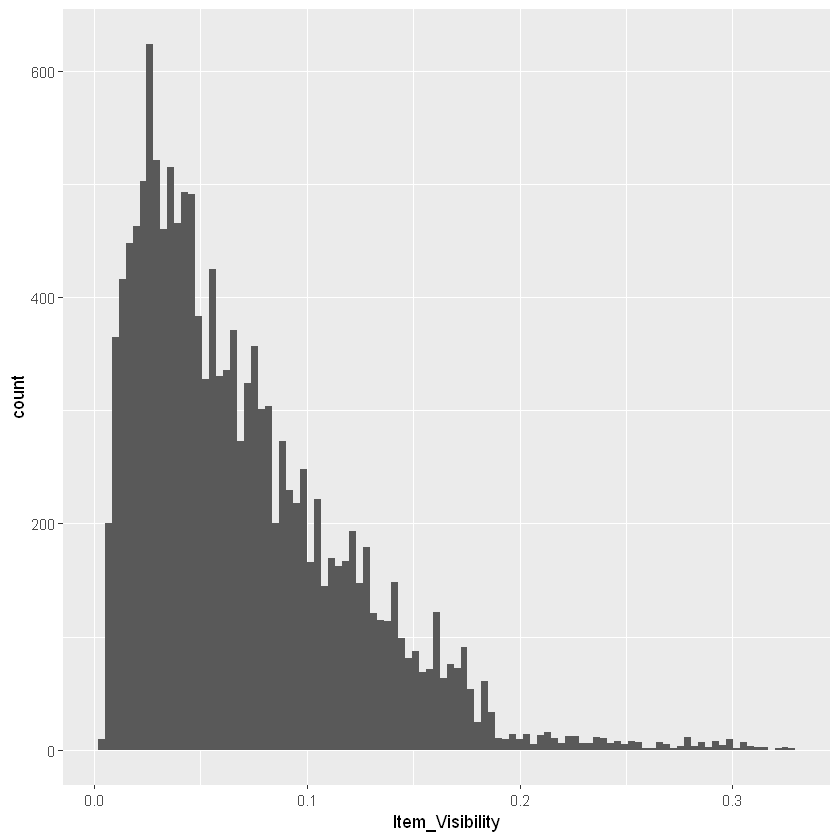

In [27]:
ggplot(combi) + geom_histogram(aes(Item_Visibility), bins = 100)

In [28]:
perishable = c("Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood")

non_perishable=c("Baking Goods","Canned","Frozen Foods","Hard Drinks","Health and Hygiene","Household","Soft Drinks")

# create a new feature 'Item_Type_new' 
combi$Item_Type_new = ifelse(combi$Item_Type %in% perishable, "perishable", 
                             ifelse(combi$Item_Type %in% non_perishable, "non_perishable", "not_sure"))

<h2>Compare Item_Type with the first 2 characters of Item_Identifier, i.e., ‘DR’, ‘FD’, and ‘NC’. These identifiers most probably stand for drinks, food, and non-consumable.</h2>

In [29]:
table(combi$Item_Type, substr(combi$Item_Identifier, 1, 2))

                       
                          DR   FD   NC
  Baking Goods             0 1086    0
  Breads                   0  416    0
  Breakfast                0  186    0
  Canned                   0 1084    0
  Dairy                  229  907    0
  Frozen Foods             0 1426    0
  Fruits and Vegetables    0 2013    0
  Hard Drinks            362    0    0
  Health and Hygiene       0    0  858
  Household                0    0 1548
  Meat                     0  736    0
  Others                   0    0  280
  Seafood                  0   89    0
  Snack Foods              0 1989    0
  Soft Drinks            726    0    0
  Starchy Foods            0  269    0

In [30]:
combi$Item_category = substr(combi$Item_Identifier, 1, 2)

In [31]:
combi$Item_Fat_Content[combi$Item_category == "NC"] = "Non-Edible" 
# years of operation for outlets 
combi$Outlet_Years = 2013 - combi$Outlet_Establishment_Year 
combi$Outlet_Establishment_Year = as.factor(combi$Outlet_Establishment_Year) 
# Price per unit weight 
combi$price_per_unit_wt = combi$Item_MRP/combi$Item_Weight

In [32]:
# creating new independent variable - Item_MRP_clusters 
combi$Item_MRP_clusters = ifelse(combi$Item_MRP < 69, "1st",
                                 ifelse(combi$Item_MRP >= 69 & combi$Item_MRP < 136, "2nd",
                                        ifelse(combi$Item_MRP >= 136 & combi$Item_MRP < 203, "3rd", "4th")))

In [33]:
combi$Outlet_Size_num = ifelse(combi$Outlet_Size == "High", 2,
                               ifelse(combi$Outlet_Size == "Medium", 1, 0)) 

combi$Outlet_Location_Type_num = ifelse(combi$Outlet_Location_Type == "Tier 3", 0,
                                        ifelse(combi$Outlet_Location_Type == "Tier 2", 1, 2))

# removing categorical variables after label encoding 

combi[, c("Outlet_Size", "Outlet_Location_Type")] = NULL

In [34]:
ohe = dummyVars("~.", data = combi[,-c(1,5 , 8)], fullRank = T) 
ohe_df = data.table(predict(ohe, combi[,-c(1,5,8)])) 
combi = cbind(combi[,"Item_Identifier"], ohe_df)

<h2><center>Data Preprocessing</center></h2>

In [35]:
combi$Item_Visibility = log(combi$Item_Visibility + 1) 
# log + 1 to avoid division by zero
combi$price_per_unit_wt = log(combi$price_per_unit_wt + 1)

In [36]:
num_vars = which(sapply(combi, is.numeric))
# index of numeric features 
num_vars_names = names(num_vars)
combi_numeric = combi[,setdiff(num_vars_names, "Item_Outlet_Sales"), with = F]
prep_num = preProcess(combi_numeric, method=c("center", "scale"))
combi_numeric_norm = predict(prep_num, combi_numeric)

combi[,setdiff(num_vars_names, "Item_Outlet_Sales")] = NULL
# removing numeric independent variables 
combi = cbind(combi, combi_numeric_norm)

In [37]:
train = combi[1:nrow(train)]
test = combi[(nrow(train) + 1):nrow(combi)]
test$Item_Outlet_Sales = NULL
# removing Item_Outlet_Sales as it contains only NA for test dataset

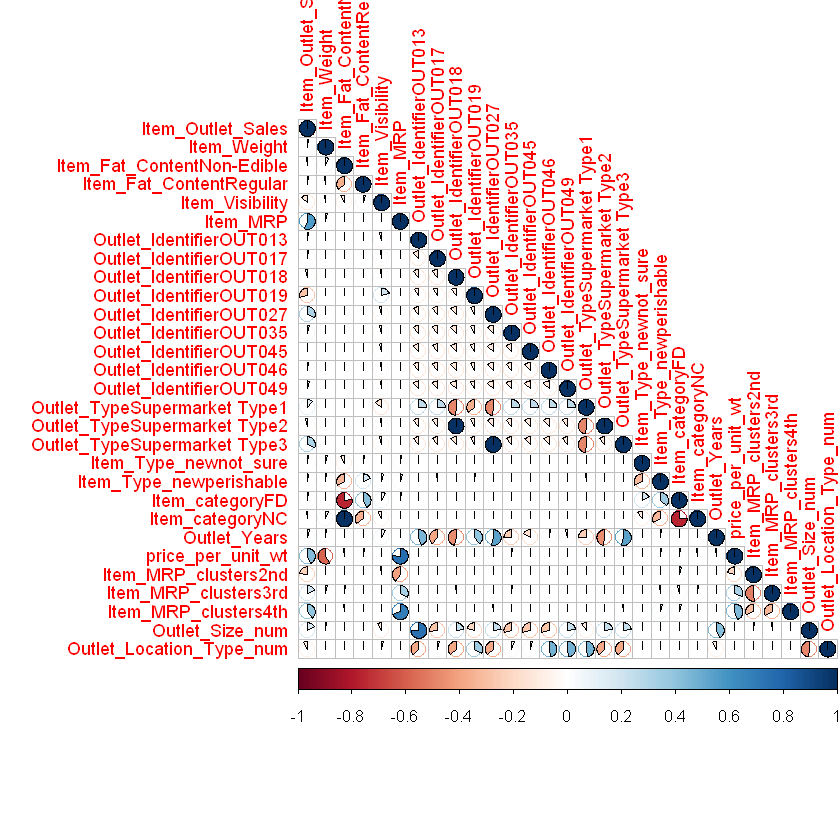

In [38]:
cor_train = cor(train[,-c(1)]) 
corrplot(cor_train, method = "pie", type = "lower", tl.cex = 0.9)

<h3>Observation:<br>
   <ul><li> Variables price_per_unit_wt and Item_Weight are highly correlated as the former one was created from the latter. Similarly price_per_unit_wt and Item_MRP are highly correlated for the same reason.</li></ul></h3>

<h2><center>-----------------------------------Building Model------------------------------------------</center></h2>

<h3>Linear Regression</h3>

In [39]:
regressor1 = lm(Item_Outlet_Sales ~ ., data = train[,-1])

In [40]:
# preparing dataframe for submission  
y_pred1 = predict(regressor1, test[,-1])

Warning message in predict.lm(regressor1, test[, -1]):
"prediction from a rank-deficient fit may be misleading"

In [41]:
R2_Score(y_pred1,y_test)

[1] 0.9308949

In [42]:
MAE(y_pred1,y_test)
MSE(y_pred1,y_test)
RMSE(y_pred1,y_test)

[1] 215.0658

[1] 115279.3

[1] 339.528

<h3>Random Forest Regression</h3>

In [43]:
regressor2 = randomForest(train[,-c(1,2)],train$Item_Outlet_Sales,ntree = 10)

In [44]:
y_pred2 = predict(regressor2,test[,-c(1)])

In [45]:
R2_Score(y_pred2,y_test)

[1] 0.893937

In [46]:
MAE(y_pred2,y_test)
MSE(y_pred2,y_test)
RMSE(y_pred2,y_test)

[1] 298.1932

[1] 176931.6

[1] 420.6324

<h3>Decision Tree Regression</h3>

In [47]:
regressor4 = rpart(Item_Outlet_Sales~.,data = train[,-1])

In [48]:
y_pred4 = predict(regressor4,test[,-1])

In [49]:
R2_Score(y_pred4,y_test)

[1] 0.9381841

In [50]:
MAE(y_pred4,y_test)
MSE(y_pred4,y_test)
RMSE(y_pred4,y_test)

[1] 245.1094

[1] 103119.8

[1] 321.1226

<h2>Performance Comparision:</h2><br>
<h3><ul><li> Linear Regression : 93.08%</li><br>
    <li> Random Forest Regression : 89.39%</li><br>
    <li> Decision Tree Regression : 93.81%</li></ul></h3>